<a href="https://colab.research.google.com/github/ibader85/AdvancedAnalytics/blob/main/07_TensorFlow_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

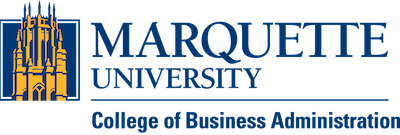

# BUAN 4061: Advanced Business Analytics
# TensorFlow 2

Instructor: Dr. Badar Al Lawati

**Acknowledgment**: This material is based on the content provided by `Daniel Bourke` in his course: [Learn TensorFlow and Deep Learning fundamentals with Python](https://www.youtube.com/watch?v=tpCFfeUEGs8&t=50s)

In [ ]:
# Import TensorFlow
import tensorflow as tf

##Manipulating tensors (tensor operations)

Finding patterns in tensors (numberical representation of data) requires manipulating them.

Again, when building models in TensorFlow, much of this pattern discovery is done for you.

###Basic operations:

You can perform many of the basic mathematical operations directly on tensors using Pyhton operators such as, `+`, `-`, `*`

In [ ]:
# You can add values to a tensor using the addition operator
tensor = tf.constant([[10, 7], [3, 4]])
tensor + 10

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[20, 17],
       [13, 14]], dtype=int32)>

Since we used `tf.constant()`, the original tensor is unchanged (the addition gets done on a copy)

In [ ]:
# Original tensor unchanged
tensor

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[10,  7],
       [ 3,  4]], dtype=int32)>

Other operators also work:

In [ ]:
# Multiplication (known as element-wise multiplication)
tensor * 10

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[100,  70],
       [ 30,  40]], dtype=int32)>

In [ ]:
# Subtraction
tensor - 10

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[ 0, -3],
       [-7, -6]], dtype=int32)>

You can also use the equivalent TensorFlow function. Using the TensorFlow function (where possible) has the advantage of being sped up later down the line when running as part of a [TensorFlow graph](https://www.tensorflow.org/tensorboard/graphs).

In [ ]:
# Use the tensorflow function equivalent of the '*' (multiply) operator
tf.multiply(tensor, 10)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[100,  70],
       [ 30,  40]], dtype=int32)>

In [ ]:
# The original tensor is still unchanged
tensor

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[10,  7],
       [ 3,  4]], dtype=int32)>

##Matrix mutliplication

One of the most common operations in machine learning algorithms is [matrix multiplication](https://www.mathsisfun.com/algebra/matrix-multiplying.html).

TensorFlow implements this matrix multiplication functionality in the `tf.matmul()` method

The main two rules for [matrix multiplication](http://matrixmultiplication.xyz/) to remember are:

1. The inner dimensions must match:
- `(3, 5) @ (3, 5)` won't work
- `(5, 3) @ (3, 5`) will work
- `(3, 5) @ (5, 3)` will work

2. The resulting matrix has the shape of the outer dimensions:
- `(5, 3) @ (3, 5)` -> `(5, 5)`
- `(3, 5) @ (5, 3)` -> `(3, 3)`

    🔑 Note: '@' in Python is the symbol for matrix multiplication.

In [ ]:
# Matrix multiplication in TensorFlow
print(tensor)
tf.matmul(tensor, tensor)

tf.Tensor(
[[10  7]
 [ 3  4]], shape=(2, 2), dtype=int32)


<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[121,  98],
       [ 42,  37]], dtype=int32)>

In [ ]:
# Matrix multiplication with Python operator '@'
tensor @ tensor

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[121,  98],
       [ 42,  37]], dtype=int32)>

Both of these examples work because our tensor variable is of shape (2, 2).

What if we created some tensors which had mismatched shapes?

In [ ]:
# Create (3, 2) tensor
X = tf.constant([[1, 2],
                 [3, 4],
                 [5, 6]])

# Create another (3, 2) tensor
Y = tf.constant([[7, 8],
                 [9, 10],
                 [11, 12]])
X, Y

(<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
 array([[1, 2],
        [3, 4],
        [5, 6]], dtype=int32)>,
 <tf.Tensor: shape=(3, 2), dtype=int32, numpy=
 array([[ 7,  8],
        [ 9, 10],
        [11, 12]], dtype=int32)>)

In [ ]:
# Try to matrix multiply them (will error)
X @ Y

InvalidArgumentError: {{function_node __wrapped__MatMul_device_/job:localhost/replica:0/task:0/device:CPU:0}} Matrix size-incompatible: In[0]: [3,2], In[1]: [3,2] [Op:MatMul] name: 

Trying to matrix multiply two tensors with the shape `(3, 2)` errors because the inner dimensions don't match

We need to either:

- Reshape X to `(2, 3)` so it's `(2, 3) @ (3, 2)`
- Reshape Y to `(3, 2)` so it's `(3, 2) @ (2, 3)`

We can do this with either:

- `tf.reshape()` - allows us to reshape a tensor into a defined shape
- `tf.transpose()` - switches the dimensions of a given tensor


Let's try `tf.reshape()` first.

In [ ]:
# Example of reshape (3, 2) -> (2, 3)
tf.reshape(Y, shape=(2, 3))

<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
array([[ 7,  8,  9],
       [10, 11, 12]], dtype=int32)>

In [ ]:
# Try matrix multiplication with reshaped Y
X @ tf.reshape(Y, shape=(2, 3))

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[ 27,  30,  33],
       [ 61,  68,  75],
       [ 95, 106, 117]], dtype=int32)>

It worked, let's try the same with a reshaped X, except this time we'll use `tf.transpose()` and `tf.matmul()`

In [ ]:
# Example of transpose (3, 2) -> (2, 3)
tf.transpose(X)
#Transpose flips the axises, While reshape changes the shape of the matrix

<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
array([[1, 3, 5],
       [2, 4, 6]], dtype=int32)>

In [ ]:
# Try matrix multiplication
tf.matmul(tf.transpose(X), Y)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[ 89,  98],
       [116, 128]], dtype=int32)>

In [ ]:
# You can achieve the same result with parameters
tf.matmul(a=X, b=Y, transpose_a=True, transpose_b=False)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[ 89,  98],
       [116, 128]], dtype=int32)>

Notice the difference in the resulting shapes when tranposing X or reshaping Y.

This is because of the 2nd rule mentioned above:

- `(3, 2) @ (2, 3)` -> `(3, 3)` done with `X @ tf.reshape(Y, shape=(2, 3))`
- `(2, 3) @ (3, 2)` -> `(2, 2)` done with `tf.matmul(tf.transpose(X), Y)`

This kind of data manipulation is a reminder: you'll spend a lot of your time in machine learning and working with neural networks reshaping data (in the form of tensors) to prepare it to be used with various operations (such as feeding it to a model)

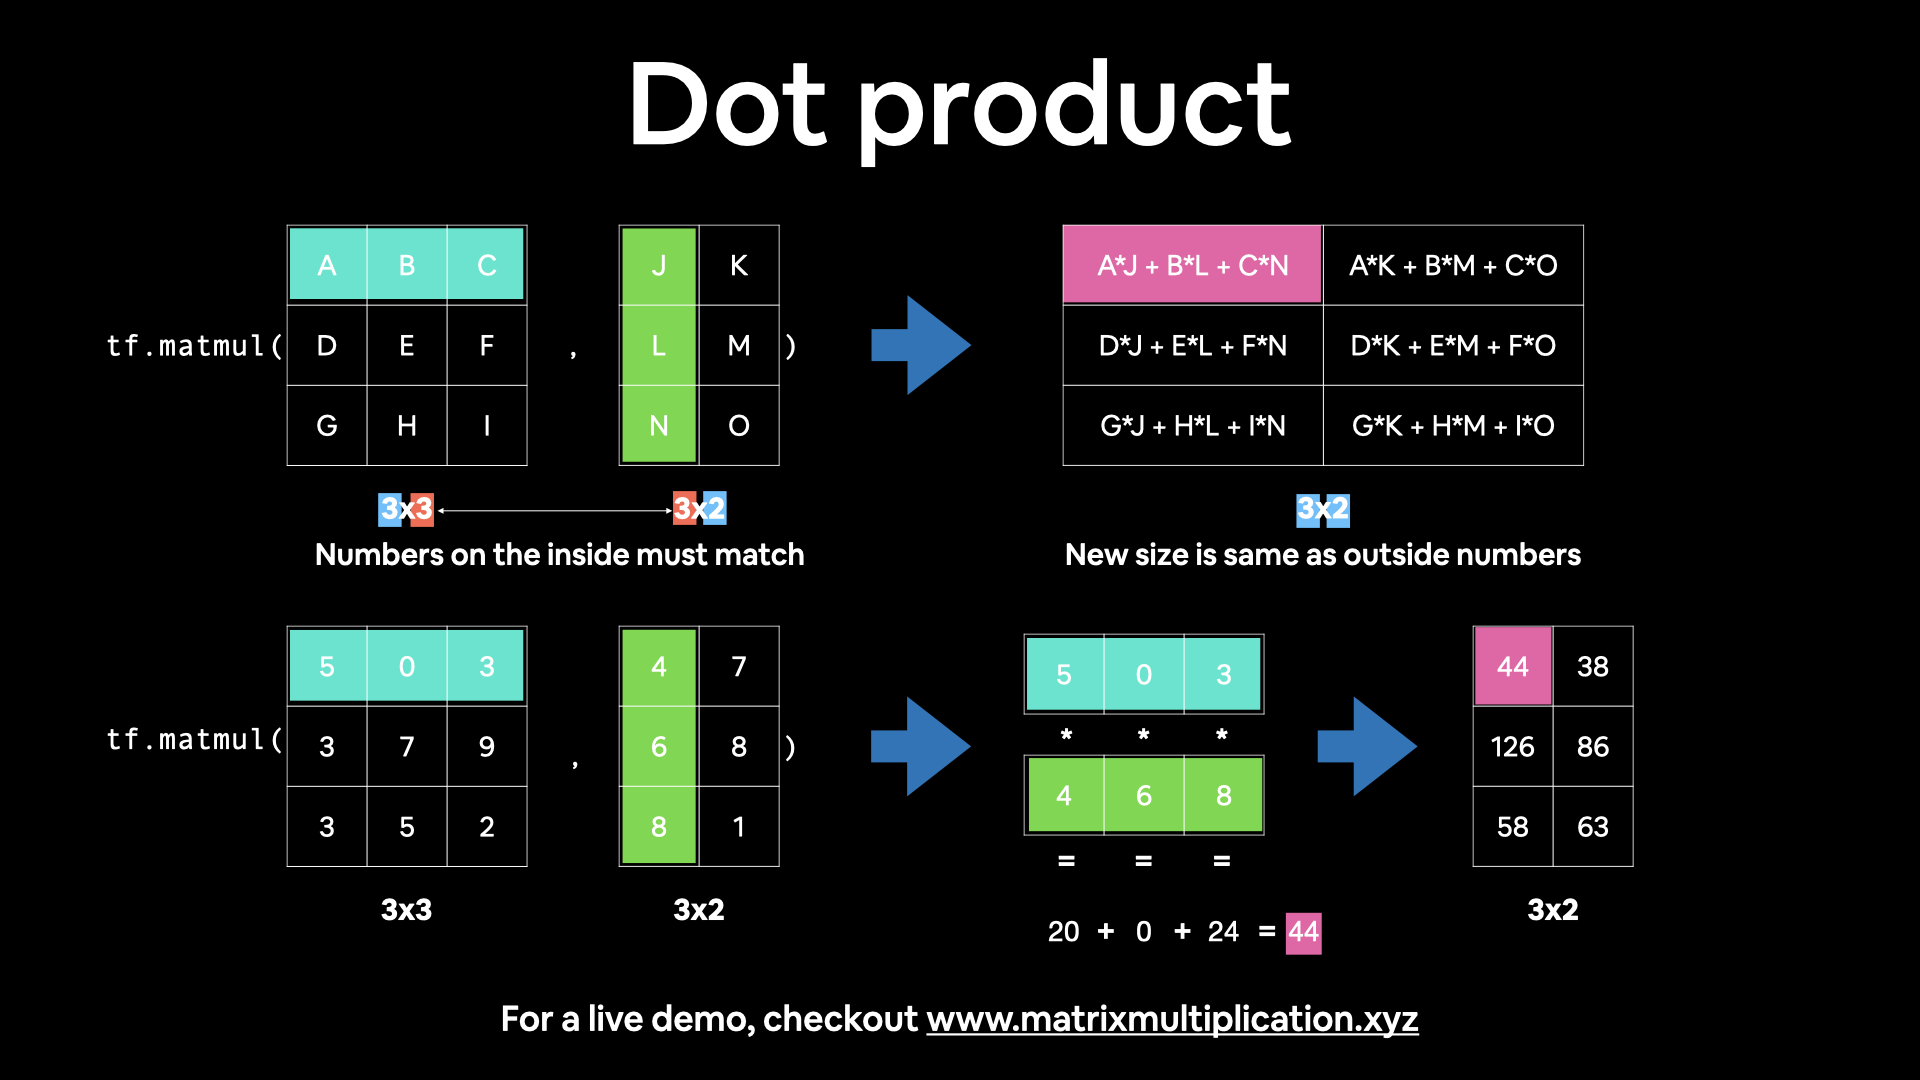


##The dot product

Multiplying matrices by eachother is also referred to as the dot product:

You can perform the `tf.matmul()` operation using `tf.tensordot()`

In [ ]:
# Perform the dot product on X and Y (requires X to be transposed)
tf.tensordot(tf.transpose(X), Y, axes=1)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[ 89,  98],
       [116, 128]], dtype=int32)>

You might notice that although using both `reshape` and `tranpose` work, you get different results when using each.

Let's see an example, first with `tf.transpose()` then with `tf.reshape()`

In [ ]:
# Perform matrix multiplication between X and Y (transposed)
tf.matmul(X, tf.transpose(Y))

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[ 23,  29,  35],
       [ 53,  67,  81],
       [ 83, 105, 127]], dtype=int32)>

In [ ]:
# Perform matrix multiplication between X and Y (reshaped)
tf.matmul(X, tf.reshape(Y, (2, 3)))

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[ 27,  30,  33],
       [ 61,  68,  75],
       [ 95, 106, 117]], dtype=int32)>

Hmm... they result in different values...

Which is strange because when dealing with `Y` (a `(3x2)` matrix), reshaping to `(2, 3)` and tranposing it result in the same shape

In [ ]:
# Check shapes of Y, reshaped Y and tranposed Y
Y.shape, tf.reshape(Y, (2, 3)).shape, tf.transpose(Y).shape

(TensorShape([3, 2]), TensorShape([2, 3]), TensorShape([2, 3]))

But calling `tf.reshape()` and `tf.transpose()` on Y don't necessarily result in the same values

In [ ]:
# Check values of Y, reshape Y and tranposed Y
print("Normal Y:")
print(Y, "\n") # "\n" for newline

print("Y reshaped to (2, 3):")
print(tf.reshape(Y, (2, 3)), "\n")

print("Y transposed:")
print(tf.transpose(Y))

Normal Y:
tf.Tensor(
[[ 7  8]
 [ 9 10]
 [11 12]], shape=(3, 2), dtype=int32) 

Y reshaped to (2, 3):
tf.Tensor(
[[ 7  8  9]
 [10 11 12]], shape=(2, 3), dtype=int32) 

Y transposed:
tf.Tensor(
[[ 7  9 11]
 [ 8 10 12]], shape=(2, 3), dtype=int32)


As you can see, the outputs of `tf.reshape()` and `tf.transpose()` when called on `Y`, even though they have the same shape, are different.

This can be explained by the default behaviour of each method:

- `tf.reshape()` - change the shape of the given tensor (first) and then insert values in order they appear (in our case, 7, 8, 9, 10, 11, 12).
- `tf.transpose()` - swap the order of the axes, by default the last axis becomes the first, however the order can be changed using the perm parameter.

So which should you use?

Again, most of the time these operations (when they need to be run, such as during the training a neural network, will be implemented for you).

But generally, whenever performing a matrix multiplication and the shapes of two matrices don't line up, you will transpose (not reshape) one of them in order to line them up.

##Matrix multiplication tidbits

- If we transposed `Y`, it would be represented as  (note the capital T for tranpose).
- Get an illustrative view of matrix multiplication by [Math is Fun](https://www.mathsisfun.com/algebra/matrix-multiplying.html)
- Try a hands-on demo of matrix multiplcation: http://matrixmultiplication.xyz/ (shown below)

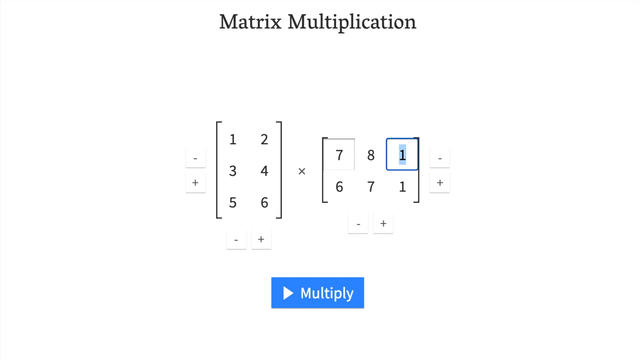

##**Changing the datatype of a tensor**

Sometimes you'll want to alter the default datatype of your tensor.

This is common when you want to compute using less precision (e.g. 16-bit floating point numbers vs. 32-bit floating point numbers).

Computing with less precision is useful on devices with less computing capacity such as mobile devices (because the less bits, the less space the computations require).

You can change the datatype of a tensor using `tf.cast()`

In [ ]:
# Create a new tensor with default datatype (float32)
B = tf.constant([1.7, 7.4])

# Create a new tensor with default datatype (int32)
C = tf.constant([1, 7])
B, C

(<tf.Tensor: shape=(2,), dtype=float32, numpy=array([1.7, 7.4], dtype=float32)>,
 <tf.Tensor: shape=(2,), dtype=int32, numpy=array([1, 7], dtype=int32)>)

In [ ]:
# Change from float32 to float16 (reduced precision)
B = tf.cast(B, dtype=tf.float16)
B

<tf.Tensor: shape=(2,), dtype=float16, numpy=array([1.7, 7.4], dtype=float16)>

In [ ]:
# Change from int32 to float32
C = tf.cast(C, dtype=tf.float32)
C

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([1., 7.], dtype=float32)>

##Getting the absolute value

Sometimes you'll want the absolute values (all values are positive) of elements in your tensors

To do so, you can use `tf.abs()`

In [ ]:
# Create tensor with negative values
D = tf.constant([-7, -10])
D

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([ -7, -10], dtype=int32)>

In [ ]:
# Get the absolute values
tf.abs(D)

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([ 7, 10], dtype=int32)>

##Finding the min, max, mean, sum (aggregation)

You can quickly aggregate (perform a calculation on a whole tensor) tensors to find things like the minimum value, maximum value, mean and sum of all the elements.

To do so, aggregation methods typically have the syntax `reduce()_[action]`, such as:

- `tf.reduce_min()` - find the minimum value in a tensor
- `tf.reduce_max()` - find the maximum value in a tensor (helpful for when you want to find the highest prediction probability)
- `tf.reduce_mean()` - find the mean of all elements in a tensor
- `tf.reduce_sum()` - find the sum of all elements in a tensor
- **Note**: typically, each of these is under the math module, e.g. tf.math.reduce_min() but you can use the alias `tf.reduce_min()`

Let's see them in action:

In [ ]:
import numpy as np
# Create a tensor with 50 random values between 0 and 100
E = tf.constant(np.random.randint(low=0, high=100, size=50))
E

<tf.Tensor: shape=(50,), dtype=int64, numpy=
array([ 9, 80, 65, 32, 85, 52, 87, 28, 34, 85, 63, 30, 87, 41, 55,  2, 30,
        3, 37, 33, 23,  0, 13, 32, 45, 81, 19, 84,  4, 78, 14, 58,  5, 71,
       82, 41, 83, 45, 38, 26, 56, 55, 91, 89,  2,  9, 77, 66, 64, 47])>

In [ ]:
# Find the minimum
tf.reduce_min(E)

<tf.Tensor: shape=(), dtype=int64, numpy=0>

In [ ]:
# Find the maximum
tf.reduce_max(E)

<tf.Tensor: shape=(), dtype=int64, numpy=91>

In [ ]:
# Find the mean
tf.reduce_mean(E)

<tf.Tensor: shape=(), dtype=int64, numpy=46>

In [ ]:
# Find the sum
tf.reduce_sum(E)

<tf.Tensor: shape=(), dtype=int64, numpy=2336>

You can also find the standard deviation `(tf.reduce_std())` and variance` (tf.reduce_variance())` of elements in a tensor using similar methods

In [ ]:
tf.math.reduce_std(tf.cast(E, dtype=tf.float32))

<tf.Tensor: shape=(), dtype=float32, numpy=28.530012>

In [ ]:
tf.math.reduce_variance(tf.cast(E, dtype=tf.float32))

<tf.Tensor: shape=(), dtype=float32, numpy=813.96155>

##Finding the positional maximum and minimum

How about finding the position a tensor where the maximum value occurs?

This is helpful when you want to line up your labels (say `['Green', 'Blue', 'Red']`) with your prediction probabilities tensor (e.g. `[0.98, 0.01, 0.01]`).

In this case, the predicted label (the one with the highest prediction probability) would be `Green`

You can do the same for the minimum (if required) with the following:

- `tf.argmax()` - find the position of the maximum element in a given tensor
- `tf.argmin()` - find the position of the minimum element in a given tensor

In [ ]:
# Create a tensor with 50 values between 0 and 1
F = tf.constant(np.random.random(50))
F

<tf.Tensor: shape=(50,), dtype=float64, numpy=
array([0.94143183, 0.53798465, 0.15382531, 0.264536  , 0.90450215,
       0.47079538, 0.755228  , 0.75711065, 0.63493644, 0.45127024,
       0.12321762, 0.54614178, 0.311828  , 0.92879215, 0.32096739,
       0.31263276, 0.91326537, 0.76768914, 0.86183518, 0.12542439,
       0.69002449, 0.37461689, 0.12240782, 0.79846815, 0.50756869,
       0.19427652, 0.11515785, 0.15905305, 0.19698497, 0.13239511,
       0.54867465, 0.57121728, 0.06728562, 0.38326332, 0.12701167,
       0.73081713, 0.61491556, 0.47237772, 0.46311814, 0.94182831,
       0.56521426, 0.85677906, 0.38931429, 0.38786479, 0.97102338,
       0.33309336, 0.97759766, 0.72577017, 0.40358602, 0.2848401 ])>

In [ ]:
# Find the maximum element position of F
tf.argmax(F)

<tf.Tensor: shape=(), dtype=int64, numpy=46>

In [ ]:
# Find the minimum element position of F
tf.argmin(F)

<tf.Tensor: shape=(), dtype=int64, numpy=32>

In [ ]:
# Find the maximum element position of F
print(f"The maximum value of F is at position: {tf.argmax(F).numpy()}")
print(f"The maximum value of F is: {tf.reduce_max(F).numpy()}")
print(f"Using tf.argmax() to index F, the maximum value of F is: {F[tf.argmax(F)].numpy()}")
print(f"Are the two max values the same (they should be)? {F[tf.argmax(F)].numpy() == tf.reduce_max(F).numpy()}")

The maximum value of F is at position: 46
The maximum value of F is: 0.9775976617328148
Using tf.argmax() to index F, the maximum value of F is: 0.9775976617328148
Are the two max values the same (they should be)? True


##Squeezing a tensor (removing all single dimensions)

If you need to remove single-dimensions from a tensor (dimensions with size 1), you can use `tf.squeeze()`

`tf.squeeze()` - remove all dimensions of 1 from a tensor:

In [ ]:
# Create a rank 5 (5 dimensions) tensor of 50 numbers between 0 and 100
G = tf.constant(np.random.randint(0, 100, 50), shape=(1, 1, 1, 1, 50))
G.shape, G.ndim
G

<tf.Tensor: shape=(1, 1, 1, 1, 50), dtype=int64, numpy=
array([[[[[90,  3, 46, 96, 86, 25, 80, 54, 57, 71, 53, 48, 25, 51, 53,
           19, 89, 72,  1, 96, 55, 94,  5,  3, 85, 83,  6, 20, 93, 83,
           25, 77, 56, 53, 50, 17,  7, 73, 56, 58,  9, 87, 29, 43, 36,
           20, 60, 95, 21, 58]]]]])>

In [ ]:
# Squeeze tensor G (remove all 1 dimensions)
G_squeezed = tf.squeeze(G)
G_squeezed.shape, G_squeezed.ndim
G_squeezed

<tf.Tensor: shape=(50,), dtype=int64, numpy=
array([90,  3, 46, 96, 86, 25, 80, 54, 57, 71, 53, 48, 25, 51, 53, 19, 89,
       72,  1, 96, 55, 94,  5,  3, 85, 83,  6, 20, 93, 83, 25, 77, 56, 53,
       50, 17,  7, 73, 56, 58,  9, 87, 29, 43, 36, 20, 60, 95, 21, 58])>

##One-hot encoding

If you have a tensor of indicies and would like to one-hot encode it, you can use `tf.one_hot()`

You should also specify the `depth` parameter (the level which you want to one-hot encode to)

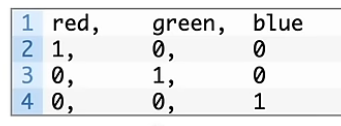

In [ ]:
# Create a list of indices
some_list = [0, 1, 2, 3]

# One hot encode them
tf.one_hot(some_list, depth=4)

<tf.Tensor: shape=(4, 4), dtype=float32, numpy=
array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]], dtype=float32)>

In [ ]:
# Specify custom values for on and off encoding
tf.one_hot(some_list, depth=4, on_value="We're live!", off_value="Offline")

<tf.Tensor: shape=(4, 4), dtype=string, numpy=
array([[b"We're live!", b'Offline', b'Offline', b'Offline'],
       [b'Offline', b"We're live!", b'Offline', b'Offline'],
       [b'Offline', b'Offline', b"We're live!", b'Offline'],
       [b'Offline', b'Offline', b'Offline', b"We're live!"]], dtype=object)>

##Squaring, log, square root

Many other common mathematical operations you'd like to perform at some stage, probably exist.

Let's take a look at:

- `tf.square()` - get the square of every value in a tensor
- `tf.sqrt()` - get the squareroot of every value in a tensor (note: the elements need to be floats or this will error)
- `tf.math.log()` - get the natural log of every value in a tensor (elements need to floats)

In [ ]:
# Create a new tensor
H = tf.constant(np.arange(1, 10))
H

<tf.Tensor: shape=(9,), dtype=int64, numpy=array([1, 2, 3, 4, 5, 6, 7, 8, 9])>

In [ ]:
# Square it
tf.square(H)

<tf.Tensor: shape=(9,), dtype=int64, numpy=array([ 1,  4,  9, 16, 25, 36, 49, 64, 81])>

In [ ]:
# Find the squareroot (will error), needs to be non-integer
tf.sqrt(H)

InvalidArgumentError: Value for attr 'T' of int64 is not in the list of allowed values: bfloat16, half, float, double, complex64, complex128
	; NodeDef: {{node Sqrt}}; Op<name=Sqrt; signature=x:T -> y:T; attr=T:type,allowed=[DT_BFLOAT16, DT_HALF, DT_FLOAT, DT_DOUBLE, DT_COMPLEX64, DT_COMPLEX128]> [Op:Sqrt] name: 

In [ ]:
# Change H to float32
H = tf.cast(H, dtype=tf.float32)
H

<tf.Tensor: shape=(9,), dtype=float32, numpy=array([1., 2., 3., 4., 5., 6., 7., 8., 9.], dtype=float32)>

In [ ]:
# Find the square root
tf.sqrt(H)

<tf.Tensor: shape=(9,), dtype=float32, numpy=
array([1.       , 1.4142135, 1.7320508, 2.       , 2.236068 , 2.4494898,
       2.6457512, 2.828427 , 3.       ], dtype=float32)>

In [ ]:
# Find the log (input also needs to be float)
tf.math.log(H)

<tf.Tensor: shape=(9,), dtype=float32, numpy=
array([0.       , 0.6931472, 1.0986123, 1.3862944, 1.609438 , 1.7917595,
       1.9459102, 2.0794415, 2.1972246], dtype=float32)>

##Manipulating `tf.Variable` tensors

Tensors created with `tf.Variable()` can be changed in place using methods such as:

- `.assign()` - assign a different value to a particular index of a variable tensor
- `.add_assign()` - add to an existing value and reassign it at a particular index of a variable tensor

In [ ]:
# Create a variable tensor
I = tf.Variable(np.arange(0, 5))
I

<tf.Variable 'Variable:0' shape=(5,) dtype=int64, numpy=array([0, 1, 2, 3, 4])>

In [ ]:
# Assign the final value a new value of 50
I.assign([0, 1, 2, 3, 50])

<tf.Variable 'UnreadVariable' shape=(5,) dtype=int64, numpy=array([ 0,  1,  2,  3, 50])>

In [ ]:
# The change happens in place (the last value is now 50, not 4)
I

<tf.Variable 'Variable:0' shape=(5,) dtype=int64, numpy=array([ 0,  1,  2,  3, 50])>

In [ ]:
# Add 10 to every element in I
I.assign_add([10, 10, 10, 10, 10])

<tf.Variable 'UnreadVariable' shape=(5,) dtype=int64, numpy=array([10, 11, 12, 13, 60])>

In [ ]:
# Again, the change happens in place
I

<tf.Variable 'Variable:0' shape=(5,) dtype=int64, numpy=array([10, 11, 12, 13, 60])>

##Tensors and NumPy

We've seen some examples of tensors interact with NumPy arrays, such as, using NumPy arrays to create tensors

Tensors can also be converted to NumPy arrays using:

- `np.array()` - pass a tensor to convert to an ndarray (NumPy's main datatype)
- `tensor.numpy()` - call on a tensor to convert to an ndarray

Doing this is helpful as it makes tensors iterable as well as allows us to use any of NumPy's methods on them

In [ ]:
# Create a tensor from a NumPy array
J = tf.constant(np.array([3., 7., 10.]))
J

<tf.Tensor: shape=(3,), dtype=float64, numpy=array([ 3.,  7., 10.])>

In [ ]:
# Convert tensor J to NumPy with np.array()
np.array(J), type(np.array(J))

(array([ 3.,  7., 10.]), numpy.ndarray)

In [ ]:
# Convert tensor J to NumPy with .numpy()
J.numpy(), type(J.numpy())

(array([ 3.,  7., 10.]), numpy.ndarray)

By default tensors have `dtype=float32`, where as NumPy arrays have `dtype=float64`

This is because neural networks (which are usually built with TensorFlow) can generally work very well with less precision (32-bit rather than 64-bit)

In [ ]:
# Create a tensor from NumPy and from an array
numpy_J = tf.constant(np.array([3., 7., 10.])) # will be float64 (due to NumPy)
tensor_J = tf.constant([3., 7., 10.]) # will be float32 (due to being TensorFlow default)
numpy_J.dtype, tensor_J.dtype

(tf.float64, tf.float32)

##Finding access to GPUs

We've mentioned GPUs plenty of times throughout this notebook

So how do you check if you've got one available?

You can check if you've got access to a GPU using `tf.config.list_physical_devices()`

In [ ]:
print(tf.config.list_physical_devices('GPU'))

[]


If the above outputs an empty array (or nothing), it means you don't have access to a GPU (or at least TensorFlow can't find it).

If you're running in Google Colab, you can access a GPU by going to Runtime -> Change Runtime Type -> Select GPU (note: after doing this your notebook will restart and any variables you've saved will be lost).

Once you've changed your runtime type, run the cell below.

In [ ]:
import tensorflow as tf
print(tf.config.list_physical_devices('GPU'))

[]
